# Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Processing


# Training Image Processing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Project datasets/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3177 files belonging to 36 classes.


# Validation Image Processing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Project datasets/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


# Bulding Module


In [ ]:
import tensorflow as tf

cnn = tf.keras.models.Sequential()

# Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))


In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))


In [ ]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

# Compiling and Training Phase


In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        36928     
                                                      

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
100/100 [==============================] - 498s 5s/step - loss: 5.9278 - accuracy: 0.0296 - val_loss: 3.5820 - val_accuracy: 0.0342
Epoch 2/32
100/100 [==============================] - 161s 2s/step - loss: 3.5267 - accuracy: 0.0494 - val_loss: 3.3674 - val_accuracy: 0.0798
Epoch 3/32
100/100 [==============================] - 170s 2s/step - loss: 3.4058 - accuracy: 0.0611 - val_loss: 3.3081 - val_accuracy: 0.1054
Epoch 4/32
100/100 [==============================] - 167s 2s/step - loss: 3.2869 - accuracy: 0.0759 - val_loss: 3.4784 - val_accuracy: 0.0969
Epoch 5/32
100/100 [==============================] - 161s 2s/step - loss: 3.2288 - accuracy: 0.0840 - val_loss: 2.9630 - val_accuracy: 0.1595
Epoch 6/32
100/100 [==============================] - 162s 2s/step - loss: 3.1056 - accuracy: 0.1083 - val_loss: 2.8081 - val_accuracy: 0.2336
Epoch 7/32
100/100 [==============================] - 162s 2s/step - loss: 2.9639 - accuracy: 0.1486 - val_loss: 2.4727 - val_accuracy: 0.2934

# Evaluating Model

In [ ]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

100/100 [==============================] - 98s 888ms/step - loss: 0.3038 - accuracy: 0.9093
Training accuracy: 0.9093484282493591


In [ ]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 15s 511ms/step - loss: 0.4115 - accuracy: 0.9060
Validation accuracy: 0.9059829115867615


# Saving Model

In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history.history

{'loss': [5.927755355834961,
  3.5266857147216797,
  3.405794858932495,
  3.2869274616241455,
  3.2287940979003906,
  3.1055750846862793,
  2.9638822078704834,
  2.824951171875,
  2.60459303855896,
  2.3330118656158447,
  2.1657118797302246,
  1.8892936706542969,
  1.7245792150497437,
  1.489435076713562,
  1.4740866422653198,
  1.3043403625488281,
  1.192780613899231,
  1.0832217931747437,
  0.9698508977890015,
  0.9288716316223145,
  0.9081181287765503,
  0.8558127880096436,
  0.8123620748519897,
  0.7253307104110718,
  0.7533095479011536,
  0.7106419205665588,
  0.6871979236602783,
  0.6504361033439636,
  0.5965584516525269,
  0.6630973219871521,
  0.5315528512001038,
  0.5283375382423401],
 'accuracy': [0.02958766184747219,
  0.04941768944263458,
  0.061063896864652634,
  0.0758577287197113,
  0.0840415507555008,
  0.10827825218439102,
  0.1485678255558014,
  0.19231979548931122,
  0.2568460702896118,
  0.3342776298522949,
  0.3616619408130646,
  0.45766445994377136,
  0.4919735491

In [ ]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 90.59829115867615 %


# Validation Accuracy

# Accuracy Visualization

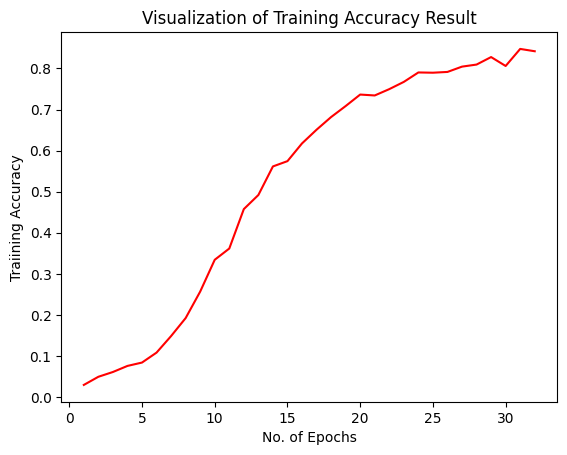

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

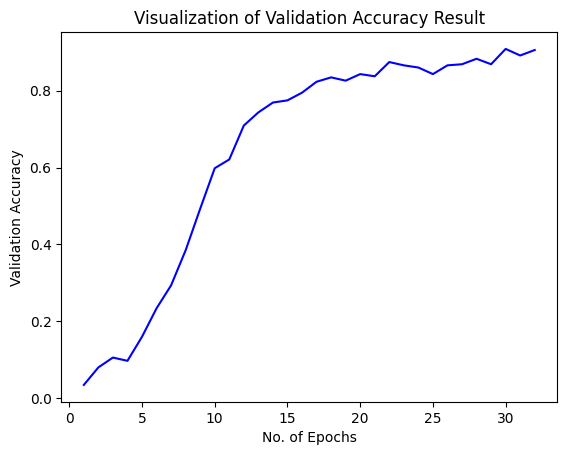

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

# Test set Evaluation

In [ ]:

test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Project datasets/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 361 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 48s 926ms/step - loss: 0.4295 - accuracy: 0.9003
Test accuracy: 0.9002770185470581
